# CAPSTONE 2: Analisis Kampanye Supermarket Berdasarkan Pola Pembelian Pelanggan

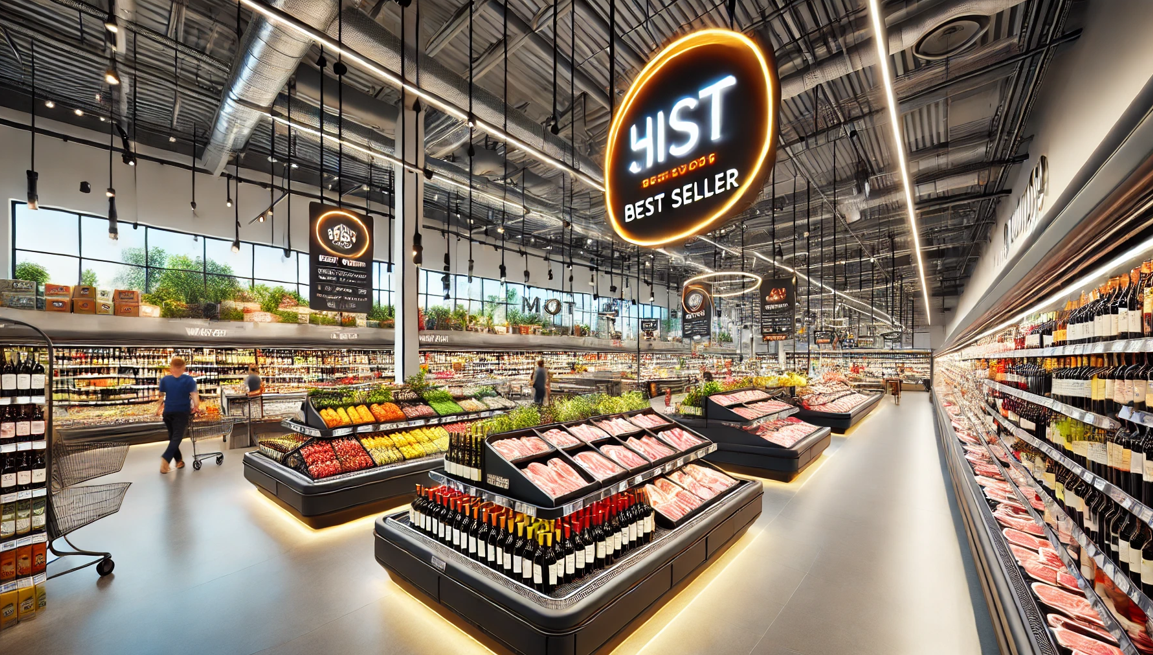](attachment:image.png)

## 1. Introduction

### 1.1 Context

Dalam industri ritel, memahami perilaku pelanggan sangat penting untuk merancang strategi pemasaran yang efektif. Dengan data yang akurat mengenai preferensi dan kebiasaan pembelian, perusahaan dapat menyusun kampanye yang lebih tepat sasaran dan relevan bagi setiap segmen pelanggan. Hal ini tidak hanya meningkatkan keterlibatan dan penjualan, tetapi juga memperkuat retensi pelanggan melalui program loyalitas yang disesuaikan dengan kebutuhan mereka. Pada akhirnya, pemahaman yang lebih mendalam tentang perilaku pelanggan akan mendorong pertumbuhan bisnis yang berkelanjutan.

### 1.2 Stakeholder

`Marketing Directors`: Bertanggung jawab atas pengawasan strategi pemasaran dan pengambilan keputusan.

### 1.3 Problem Statement

`Pertanyaan bisnis`: Bagaimana strategi mengoptimalkan kampanye pemasaran untuk meningkatkan keterlibatan, jumlah penjualan produk, serta memperbaiki retensi pelanggan?
* Bagaimana keberhasilan kampanye yang pernah dilakukan?
* Bagaimana hubungan demografi terhadap segmentasi pelanggan?
* Bagaimana preferensi tiap segmen pelanggan?

### 1.4 Goals

Tujuan utama dari analisis ini adalah mengoptimalkan kampanye pemasaran untuk meningkatkan keterlibatan, jumlah penjualan produk, serta memperbaiki retensi pelanggan, melalui tahapan:
* Mengevaluasi kampanye yang pernah dilakukan.
* Mengidentifikasi pola demografi yang mempengaruhi segmen pelanggan melalui RFM.
* Menyesuaikan kampanye dengan preferensi pelanggan.

## 2. Data Understanding

Dataset ini berisi tentang informasi transaksi dan demografi setiap pelanggan di suatu superstore di tahun 2012-2014 dengan total 2240 data termuat dalam 29 kolom. Berikut merupakan informasi yang termuat dalam kolom-kolom tersebut.

| **Kolom**             | **Deskripsi**                                             |
|-----------------------|----------------------------------------------------------|
| ID                    | Identifikasi unik pelanggan                               |
| Year_Birth            | Tahun kelahiran pelanggan                                 |
| Education             | Tingkat pendidikan pelanggan                              |
| Marital_Status        | Status pernikahan pelanggan                               |
| Income                | Pendapatan tahunan rumah tangga pelanggan                 |
| Kidhome               | Jumlah anak di rumah tangga pelanggan                     |
| Teenhome              | Jumlah remaja di rumah tangga pelanggan                   |
| Dt_Customer           | Tanggal pendaftaran pelanggan dengan perusahaan           |
| Recency               | Jumlah hari sejak pembelian terakhir oleh pelanggan       |
| Complain              | 1 jika pelanggan mengajukan keluhan dalam 2 tahun terakhir, 0 jika tidak |
| MntWines              | Total harga pembelian produk wine dalam 2 tahun terakhir|
| MntFruits             | Total harga pembelian produk buah-buahan dalam 2 tahun terakhir |
| MntMeatProducts       | Total harga pembelian produk daging dalam 2 tahun terakhir |
| MntFishProducts       | Total harga pembelian produk ikan dalam 2 tahun terakhir |
| MntSweetProducts      | Total harga pembelian produk manisan dalam 2 tahun terakhir |
| MntGoldProds          | Total harga pembelian produk emas dalam 2 tahun terakhir  |
| NumDealsPurchases     | Total harga pembelian yang dilakukan dengan diskon             |
| AcceptedCmp1          | 1 jika pelanggan menerima penawaran pada kampanye pertama, 0 jika tidak |
| AcceptedCmp2          | 1 jika pelanggan menerima penawaran pada kampanye kedua, 0 jika tidak |
| AcceptedCmp3          | 1 jika pelanggan menerima penawaran pada kampanye ketiga, 0 jika tidak |
| AcceptedCmp4          | 1 jika pelanggan menerima penawaran pada kampanye keempat, 0 jika tidak |
| AcceptedCmp5          | 1 jika pelanggan menerima penawaran pada kampanye kelima, 0 jika tidak |
| Response              | 1 jika pelanggan menerima penawaran pada kampanye terakhir, 0 jika tidak |
| NumWebPurchases       | Frekuensi pembelian yang dilakukan melalui situs web perusahaan |
| NumCatalogPurchases   | Frekuensi pembelian yang dilakukan menggunakan katalog       |
| NumStorePurchases     | Frekuensi pembelian yang dilakukan langsung di toko          |
| NumWebVisitsMonth     | Frekuensi kunjungan ke situs web perusahaan dalam sebulan terakhir |

In [171]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency

In [172]:
# Memuat Dataset
df = pd.read_csv('Supermarket Customers.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 3. Data Cleaning

In [173]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### 3.1 Kesesuaian Tipe Data

In [174]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [175]:
# Menyesuaikan tipe data
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True, errors='coerce').dt.strftime('%d-%m-%Y')
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

> Terdapat ketidaksesuaian tipe data kolom 'Dt_Customer', tertera bertipe object, seharusnya bertipe datetime64[ns].

### 3.2 Ketidakkonsistenan data

In [176]:
# Memeriksa unique value setiap kolom
listItem = []
for i in df.columns:
    count_unique = df[i].nunique()
    unique_value = df[i].unique()
    listItem.append([i, count_unique, unique_value])

unique_table = pd.DataFrame(data=listItem, columns=['Nama Kolom', 'Jumlah Unique', 'Unique Value'])
unique_table

,Nama Kolom,Jumlah Unique,Unique Value
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


#### a. Education

In [177]:
# Memeriksa unique value pada kolom Education
df['Education'].value_counts().reset_index()

,Education,count
0,Graduation,1127
1,PhD,486
2,Master,370
3,2n Cycle,203
4,Basic,54


In [178]:
# Menyesuaikan value pada kolom Education
df['Education'] = df['Education'].replace({'2n Cycle': 'Master', 'Graduation': 'Bachelor'})
df['Education'].value_counts().reset_index()

,Education,count
0,Bachelor,1127
1,Master,573
2,PhD,486
3,Basic,54


> * Master dan 2nd Cycle merujuk pada definisi yang sama, yaitu gelar akademik yang diberikan kepada lulusan program pendidikan magister (S2).
> * Graduation menjadi Bachelor untuk menyesuaikan jenis istilah istilah yang digunakan pada kolom Education.

#### b. Marital Status

In [179]:
# Memeriksa unique value pada kolom Marital Status
df['Marital_Status'].value_counts().reset_index()

,Marital_Status,count
0,Married,864
1,Together,580
2,Single,480
3,Divorced,232
4,Widow,77
5,Alone,3
6,Absurd,2
7,YOLO,2


In [180]:
df = df[~df['Marital_Status'].isin(['Alone', 'Absurd', 'YOLO'])]
df['Marital_Status'].value_counts().reset_index()

,Marital_Status,count
0,Married,864
1,Together,580
2,Single,480
3,Divorced,232
4,Widow,77


> Istilah Alone, Absurd, YOLO tidak merujuk pada definisi suatu jenis status pernikahan dengan jelas.

#### c. Response

In [181]:
# Menangangani Inkonsistensi penamaan kolom
df.rename(columns={'Response': 'AcceptedCmp6'}, inplace=True)
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue',
       'AcceptedCmp6'],
      dtype='object')

> Berdasarkan dictionary kolom data, penamaan 'Response' tidak konsisten.

### 3.3 Missing Value 

In [182]:
# Memeriksa adanya missing value
missing_values = df.isnull().sum()
print(f'Nama kolom dan jumlah missing values di dataset ini adalah: {missing_values[missing_values > 0]}')

Nama kolom dan jumlah missing values di dataset ini adalah: Income    24
dtype: int64


In [183]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,AcceptedCmp6
10,1994,1983,Bachelor,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Bachelor,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Bachelor,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Bachelor,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,Master,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Bachelor,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


Pola missing value antar kolom:


<Axes: >

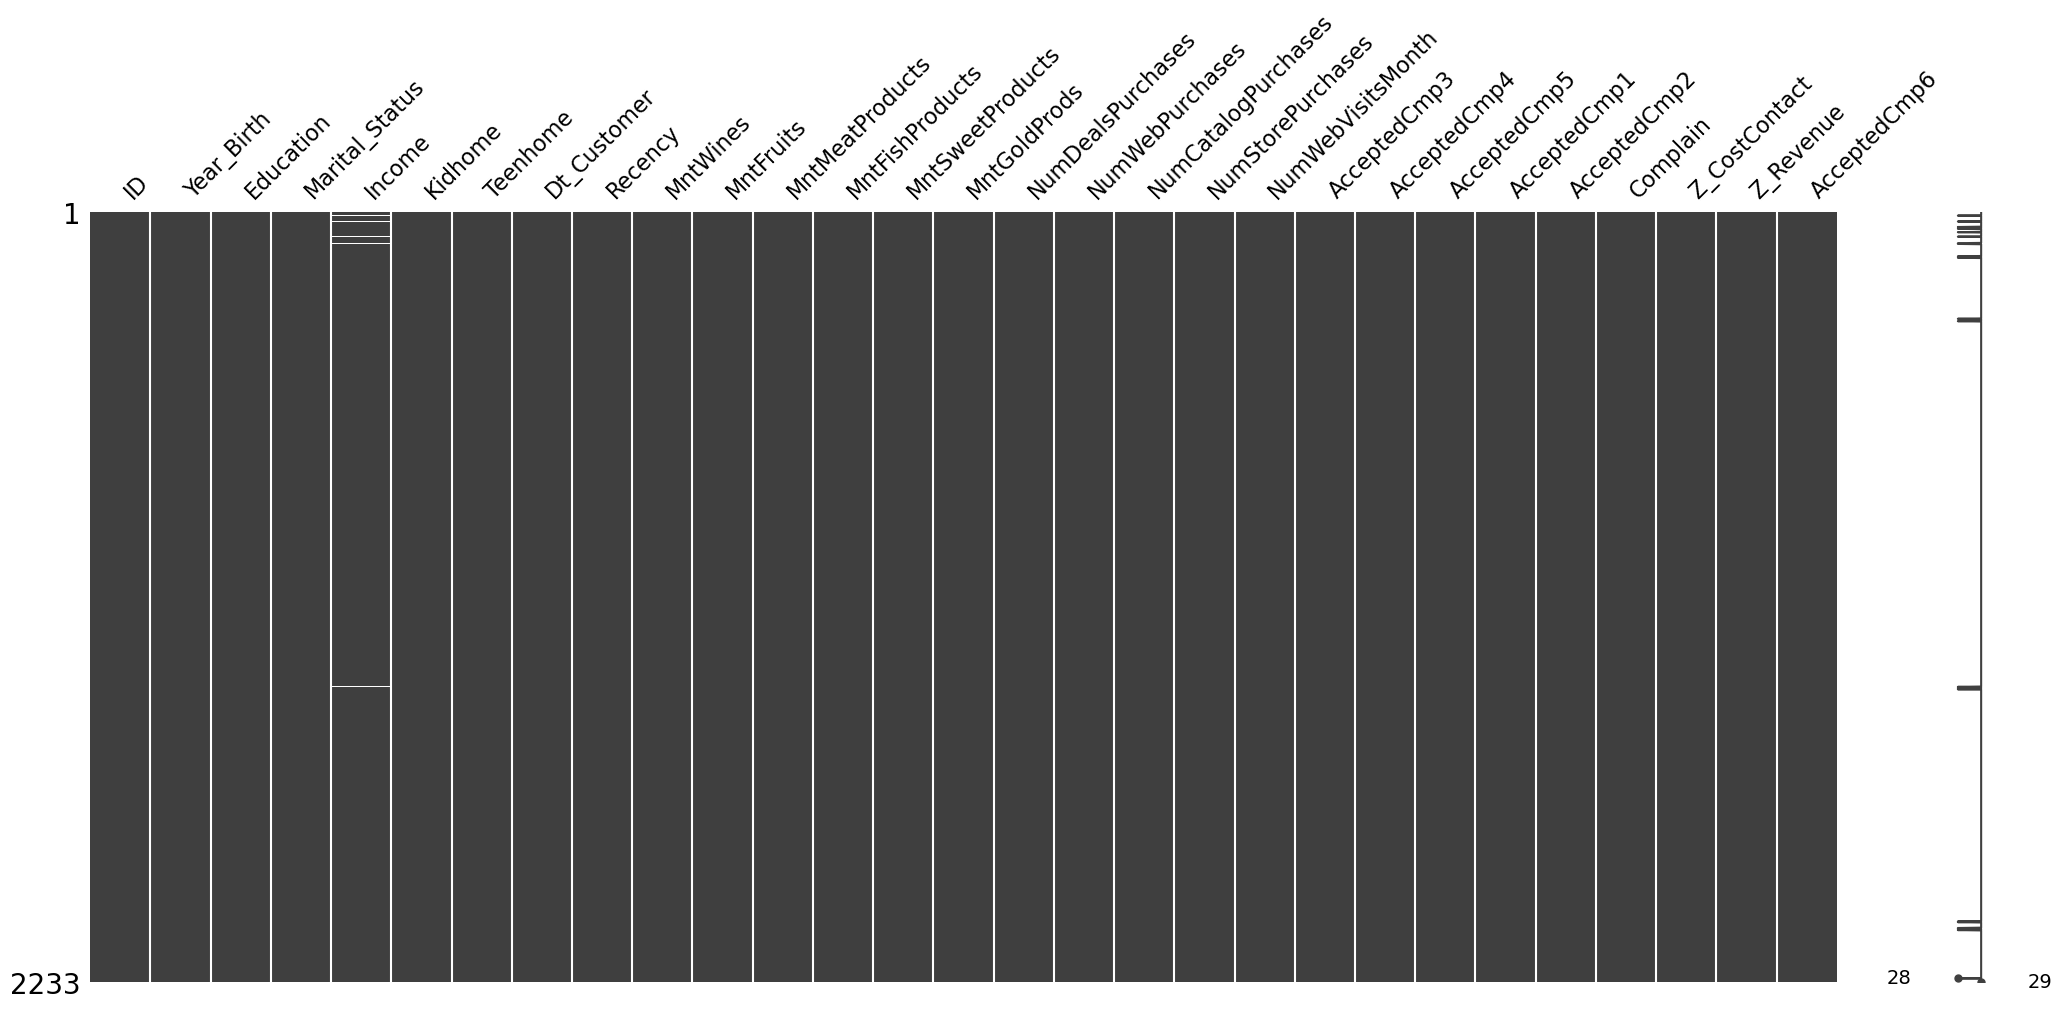

In [184]:
# Melihat pola missing value
print(f'Pola missing value antar kolom:')
msno.matrix(df)

In [185]:
# Menangani missing value
df.dropna(inplace=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
AcceptedCmp6           0
dtype: int64

> Missing value hanya terdapat di kolom Income dengan proporsinya 1.01% dari 2240 total data, serta memiliki pola MCaR (Missing Completely at Random). Maka baris dengan missing value pada kolom Income dapat dihapus.

### 3.4 Data Duplikat

In [186]:
# Memeriksa adanya data duplikat
print(f"Jumlah data duplikat di Supermarket dataset adalah {df['ID'].duplicated().sum()}")

Jumlah data duplikat di Supermarket dataset adalah 0


> Tidak terdapat data duplikat.

### 3.5 Outliers

In [187]:
# Membuat kolom baru unruk memudahkan pengecekan outlier Year_Birth
df['Age'] = 2014 - df['Year_Birth']

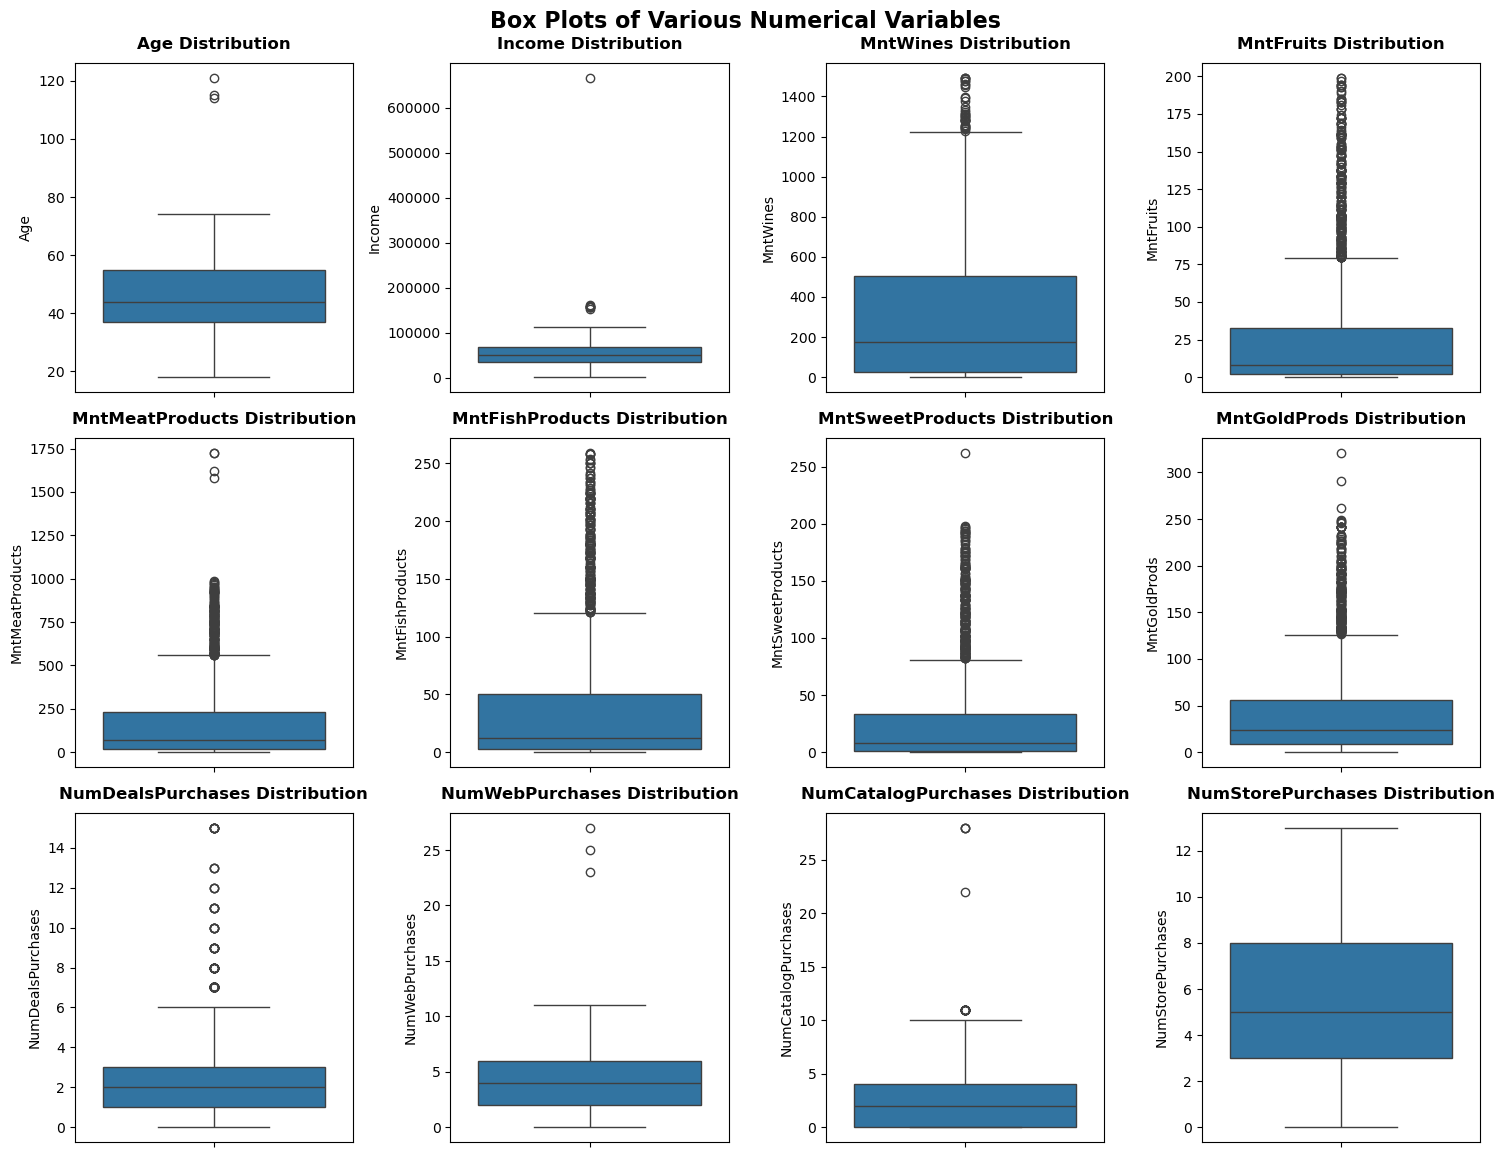

In [188]:
# Daftar kolom numerik yang akan dicek boxplot
columns = ['Age', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
            'NumCatalogPurchases', 'NumStorePurchases']

# Membuat subplot grid sesuai dengan jumlah kolom
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'{col} Distribution', pad=10, fontweight='bold', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.suptitle('Box Plots of Various Numerical Variables', fontsize=16, fontweight='bold')
plt.show()

#### a. Year Birth

In [189]:
# Mencari Outlier di Kolom Year Birth
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print ('Tabel data yang memuat outlier pada kolom Age:')
outliers

Tabel data yang memuat outlier pada kolom Age:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,AcceptedCmp6,Age
192,7829,1900,Master,Divorced,36640.0,1,0,26-09-2013,99,15,...,0,0,0,0,0,1,3,11,0,114
239,11004,1893,Master,Single,60182.0,0,1,17-05-2014,23,8,...,0,0,0,0,0,0,3,11,0,121
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,0,0,1,0,0,0,3,11,0,115


In [190]:
min_age = df[((df['Age'] > lower_bound) | (df['Age'] < upper_bound))]['Age'].min()
max_age = df[((df['Age'] > lower_bound) | (df['Age'] < upper_bound))]['Age'].max()
print(f'Rentang umur pelanggan tanpa outliers: {min_age} - {max_age}')

Rentang umur pelanggan tanpa outliers: 18 - 121


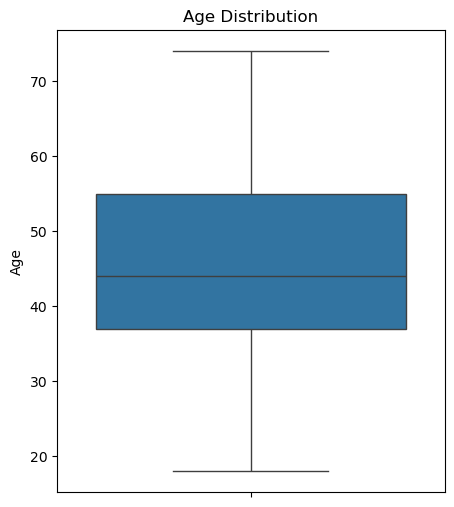

In [195]:
# Menangani Outlier Age
df = df[~((df['Age'] < lower_bound) | (df['Age'] > upper_bound))]
plt.figure(figsize=(5,6))
sns.boxplot(y=df['Age'])
plt.title(f'Age Distribution')
plt.show()

> Outlier pada kolom Age memuat nilai yang akan menyebabkan adanya binning grup umur yang kosong dikarenakan adanya gap kosong yang cukup besar antara nilai max-age-tanpa-outlier dengan outlier. Oleh karena itu, outlier pada Year_Birth dihapus.

#### b. Income

In [192]:
# Mencari Outlier di Kolom Income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
print(f"Outlier di kolom Income:")
outliers

Outlier di kolom Income:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,AcceptedCmp6,Age
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,3,11,0,41
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,...,0,0,0,0,0,0,3,11,0,38
655,5555,1975,Bachelor,Divorced,153924.0,0,0,07-02-2014,81,1,...,0,0,0,0,0,0,3,11,0,39
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,3,11,0,32
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,...,0,0,0,0,0,0,3,11,0,43
1653,4931,1977,Bachelor,Together,157146.0,0,0,29-04-2013,13,1,...,0,0,0,0,0,0,3,11,0,37
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,0,0,0,0,0,3,11,0,65
2233,9432,1977,Bachelor,Together,666666.0,1,0,02-06-2013,23,9,...,0,0,0,0,0,0,3,11,0,37


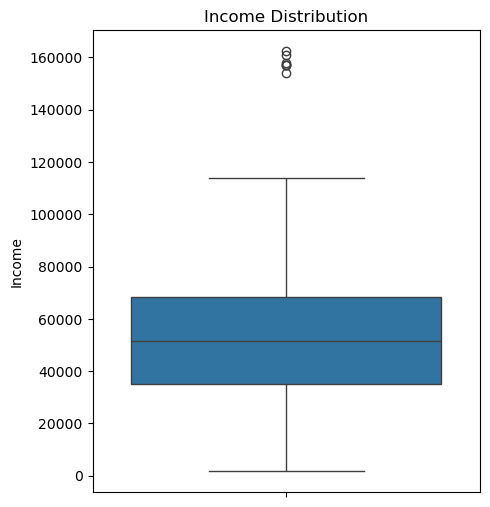

In [193]:
# Menangani ekstrim outlier Income
df = df[~(df['Income'] > 600000)]

# Boxplot Income
plt.figure(figsize=(5,6))
sns.boxplot(y=df['Income'])
plt.title(f'Income Distribution')
plt.show()

> Terdapat beberapa outlier yang dekat dengan upper bound dan satu ekstrim outlier pada kolom Income. Namun value yang akan dihapus hanya ekstrim outlier, karena dapat menyebabkan hasil analisis menjadi bias. Oleh karena itu, ekstrim outlier pada Income perlu dihapus.

#### c. Kolom Lainnya

In [196]:
columns = [ 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases']

for col in columns:
    # Mencari rentang outlier di kolom
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    count_outlier = outliers.shape[0]
    min_outlier = outliers[col].min()
    max_outlier = outliers[col].max()
    print(f"Rentang nilai outlier di kolom {col}: {min_outlier:.2f} - {max_outlier:.2f}")

Rentang nilai outlier di kolom MntFruits: 80.00 - 199.00
Rentang nilai outlier di kolom MntMeatProducts: 559.00 - 1725.00
Rentang nilai outlier di kolom MntFishProducts: 121.00 - 259.00
Rentang nilai outlier di kolom MntSweetProducts: 82.00 - 262.00
Rentang nilai outlier di kolom MntGoldProds: 127.00 - 321.00
Rentang nilai outlier di kolom NumDealsPurchases: 7.00 - 15.00
Rentang nilai outlier di kolom NumWebPurchases: 23.00 - 27.00
Rentang nilai outlier di kolom NumCatalogPurchases: 11.00 - 28.00


> * Nilai outliers pada kolom yang diawali Mnt- merupakan total harga produk yang dibeli selama 2 tahun. Sehingga tidak perlu ditangani.
> *  Nilai outliers pada kolom yang diawali Num- merupakan total harga produk yang dibeli selama 2 tahun. Sehingga tidak perlu ditangani.

### 3.6 Membuat Kolom Baru

In [198]:
# Membuat kolom Age Group
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 74], labels=['Young Adult', 'Early Middle Age', 'Middle Aged', 'Late Middle Aged', 'Elderly'])

# Membuat kolom Income Group
df['Income_Group'] = pd.cut(df['Income'], bins=[0, 12000, 35000, 75000, 150000, float('inf')], 
                    labels=['Low Income', 'Lower-Middle Income', 'Middle Income', 'Upper-Middle Income', 'High Income'])

# Membuat kolom Total Spent (Monetary)
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Frequency: Menggunakan jumlah total pembelian sebagai proxy untuk frequency
df['Frequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Membuat kolom 'Dependents' untuk status orang tua
df['Dependents'] = df[['Kidhome','Teenhome']].sum(axis=1)

# Membuat kolom Total number of campaigns accepted
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']].sum(axis=1)

In [199]:
# Mengurutkan kolom
df = df[['ID', 'Age_Group', 'Education', 'Marital_Status', 'Income_Group', 'Dependents',
                'Dt_Customer', 'Recency', 'Frequency', 'Monetary', 'Complain', 'MntWines',
                'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                'MntGoldProds', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2',
                'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6',
                'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                'TotalAcceptedCmp']]

## 4. Analisis dan Rekomendasi

### 3.1 Acceptance Rate Campaign

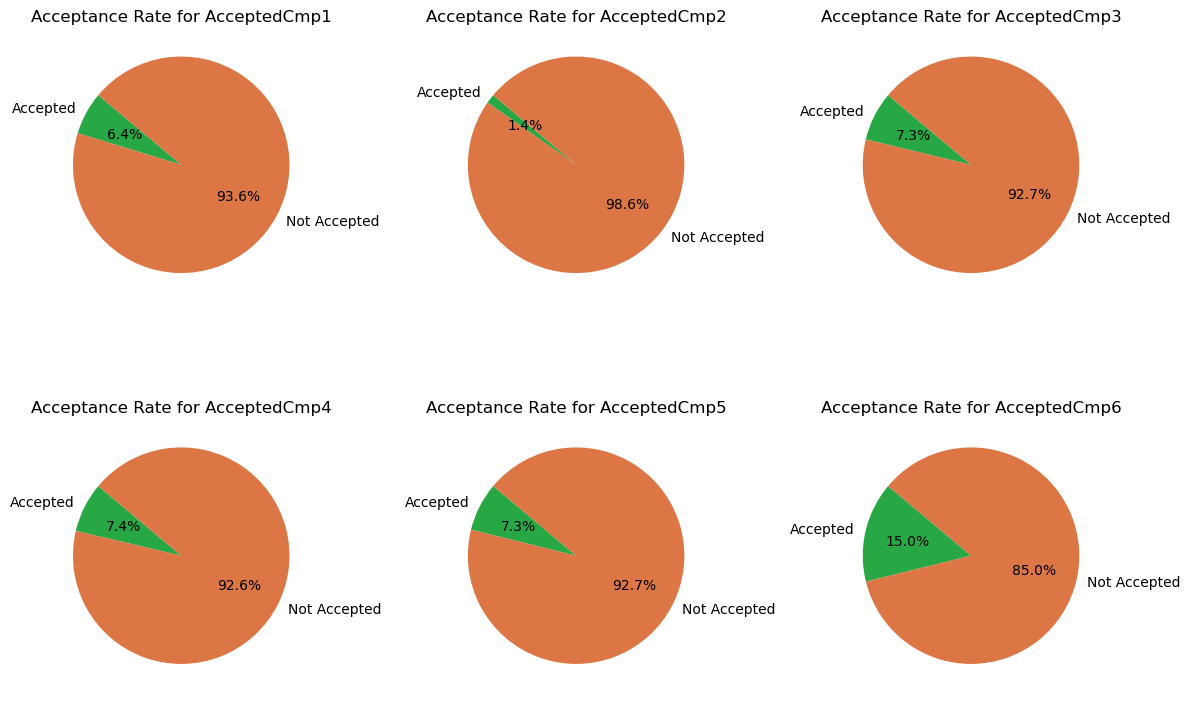

In [200]:
# Daftar kolom kampanye
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, campaign in enumerate(campaigns):
    accepted_count = df[campaign].sum()
    not_accepted_count = df.shape[0] - accepted_count
    # Data untuk pie chart
    data = [accepted_count, not_accepted_count]
    labels = ['Accepted', 'Not Accepted']
    
    axes[i].pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#28a745', '#dc7645'])
    axes[i].set_title(f'Acceptance Rate for {campaign}')

plt.tight_layout()
plt.show()


In [204]:
print(f'Rata-rata acceptance rate untuk 6 kampanye yang sudah dilakukan: {(round(100*df["TotalAcceptedCmp"].sum()/(6*2205),2))}%')

Rata-rata acceptance rate untuk 6 kampanye yang sudah dilakukan: 7.46%


> Insight: 
* Rata-rata acceptance 6 kampanye sangat rendah. Bahkan tidak mencapai 10% dari total pelanggan.
* Kampanye 1-5 menunjukkan acceptance rate yang sangat rendah, secara berturut-turut hanya 6.4%, 1.4%, 7.3%, 7.4%, dan 7.3% dari total 2205 pelanggan. 
* Acceptance rate Kampanye 6 menjadi yang tertinggi di antara semua kampanye, namun masih tergolong rendah yaitu dengan acceptance rate sebesar 15.0%.

> Rekomendasi:
Perlu dirancang kembali strategi kampanye dengan mengkombinasikan faktor-faktor yang menyebabkan meningkatnya acceptance rate pada Kampanye ke-6 dan menghindari faktor yang menyebabkan rendahnya acceptance rate Kampanye ke-2. 

### 3.2 Segmentasi Pelanggan dengan Analisis RFM

In [210]:
df_rfm = df.copy()

# Assign R, F, M scores
df_rfm['R_score'] = pd.cut(df_rfm['Recency'], bins=5, labels=[5, 4, 3, 2, 1]).astype(int)
df_rfm['F_score'] = pd.cut(df_rfm['Frequency'], bins=5, labels=[1, 2, 3, 4, 5]).astype(int)
df_rfm['M_score'] = pd.cut(df_rfm['Monetary'], bins=5, labels=[1, 2, 3, 4, 5]).astype(int)

# Combine R, F, M scores to create RFM Score
df_rfm['RFM Score'] = df_rfm['R_score'].astype(str) + df_rfm['F_score'].astype(str) + df_rfm['M_score'].astype(str)
df_rfm['RFM Score'] = df_rfm['RFM Score'].astype(int) 

# Create customer segments based on RFM score
Champion = [555, 554, 544, 545, 454, 455, 445]
Loyal_Customer = [543, 444, 435, 355, 354, 345, 344, 335]
Potential_Loyalist = [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]
New_Customer = [512, 511, 422, 421, 412, 411, 311]
Promising = [525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313]
Need_Attention = [535, 534, 443, 434, 343, 334, 325, 324]
Cannot_Lose_Them = [155, 154, 144, 214,215,115, 114, 113]
About_to_Sleep = [331, 321, 312, 221, 213]
At_Risk = [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]
Hibernating = [332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211]
Lost = [111, 112, 121, 131, 141, 151]

# Create a function to assign customers to various customer segments based on RFM score
def assign_cust_seg(col):
    segment = []
    for score in col:
        if score in Champion:
            value = 'Champion'
        elif score in Loyal_Customer:
            value = 'Loyal Customer'
        elif score in Potential_Loyalist:
            value = 'Potential Loyalist'
        elif score in New_Customer:
            value = 'New Customer'
        elif score in Promising:
            value = 'Promising'
        elif score in Need_Attention:
            value = 'Need Attention'
        elif score in Cannot_Lose_Them:
            value = 'Cannot Lose Them'
        elif score in About_to_Sleep:
            value = 'About to Sleep'
        elif score in At_Risk:
            value = 'At Risk'
        elif score in Hibernating:
            value = 'Hibernating'
        elif score in Lost:
            value = 'Lost'
        else:
            value = 'null'
        segment.append(value)
    return segment

# Assign customers to segments based on their RFM score
df_rfm['Segment'] = assign_cust_seg(df_rfm['RFM Score'])
df_rfm.sample(5)


,ID,Age_Group,Education,Marital_Status,Income_Group,Dependents,Dt_Customer,Recency,Frequency,Monetary,...,AcceptedCmp6,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalAcceptedCmp,R_score,F_score,M_score,RFM Score,Segment
67,9369,Early Middle Age,Master,Single,Upper-Middle Income,1,19-03-2014,19,32,1274,...,1,11,10,10,3,5,4,3,543,Loyal Customer
1367,3231,Middle Aged,Bachelor,Married,Middle Income,1,25-11-2013,97,5,30,...,0,1,0,3,0,1,1,1,111,Lost
364,5837,Middle Aged,Bachelor,Married,Middle Income,2,28-12-2012,67,22,494,...,0,6,3,6,0,2,3,1,231,Hibernating
666,8754,Early Middle Age,PhD,Together,Middle Income,1,16-05-2013,25,4,20,...,0,1,0,2,0,4,1,1,411,New Customer
1563,4828,Late Middle Aged,Bachelor,Divorced,Upper-Middle Income,1,18-06-2014,12,21,792,...,0,5,10,5,0,5,3,2,532,Potential Loyalist


In [211]:
# Memastikan tidak ada pelanggan yang tidak masuk ke segmen manapun
df_rfm['Segment'].value_counts()

Segment
New Customer          520
Hibernating           423
Potential Loyalist    322
Lost                  245
About to Sleep        209
At Risk               177
Promising             154
Need Attention         99
Loyal Customer         42
Cannot Lose Them        8
Champion                6
Name: count, dtype: int64

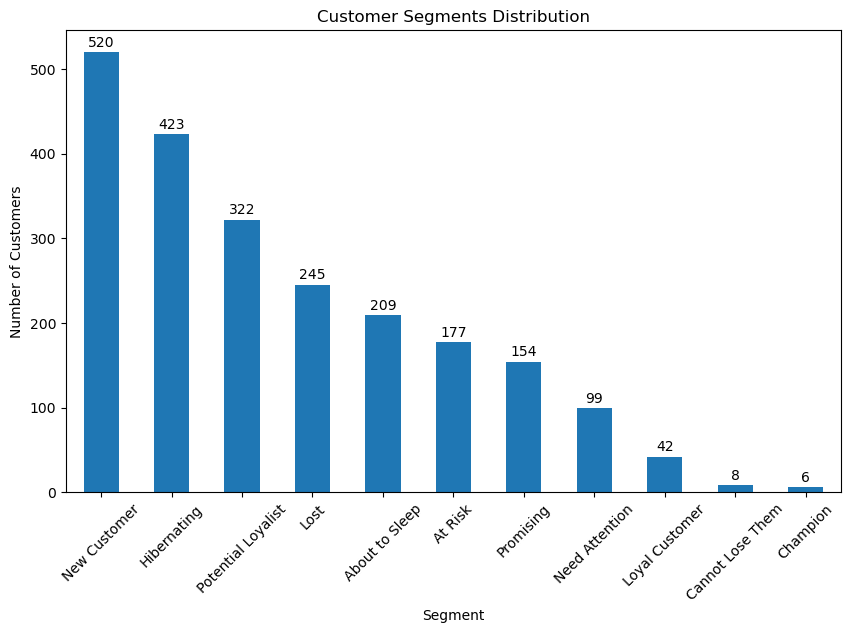

In [212]:
# Visualisasi
plt.figure(figsize=(10, 6))
ax = df_rfm['Segment'].value_counts().plot(kind='bar')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()-5), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
                textcoords='offset points')

plt.title('Customer Segments Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

* `Champions`: Membeli baru-baru ini, sering membeli dan menghabiskan paling banyak uang.
* `Loyal Customers`: Sering menghabiskan banyak uang, mempunyai frekuensi rata-rata.
* `Potential Loyalists`: Pelanggan melakukan pembelian baru-baru ini, sering melakukan transaksi. Namun uang yang dikeluarkan pelanggan masih di bawah rata-rata.
* `New Customers`: Pelanggan yang baru saja melakukan pembelian tetapi tidak sering.
* `Promising`:  Pelanggan yang baru saja melakukan pembelian tetapi belum menghabiskan banyak uang.
* `Need Attention`: Pelanggan dengan frekuensi, nilai pembelian, dan aktivitas yang di atas rata-rata, tetapi perlu dihubungi kembali.
* `About to Sleep`: Pelanggan dengan frekuensi, nilai pembelian, dan aktivitas di bawah rata-rata.
* `At Risk`: Pelanggan yang dulunya aktif tetapi belum melakukan pembelian baru-baru ini.
* `Can’t Lose Them`: Pelanggan yang pernah melakukan pembelian besar tetapi tidak dalam waktu dekat.
* `Hibernating`: Pelanggan dengan frekuensi dan nilai pembelian yang rendah, yang belum aktif dalam waktu lama.
* `Lost`: Pelanggan dengan frekuensi, nilai pembelian, dan aktivitas yang paling rendah.

> Insight:
Segmen "New Customer" memiliki jumlah pelanggan terbanyak (520), diikuti oleh segmen "Hibernating" (432), "Potential Loyalist" (322), "Lost" (245), "About to Sleep" (209), "At Risk" (177), "Promising" (154), "Need Attention" (99), "Loyal Customer" (42), "Cannot Lose Them" (8), dan "Champion" (6). Ini menunjukkan bahwa 50% pelanggan berada di segmen dengan nilai monetary yang rendah. Dan Top segmen (Champion dan Loyal Customer) justru berada di posisi terbawah.

| Segmen Pelanggan             | Kampanye                                                                                                  |
|------------------------------|------------------------------------------------------------------------------------------------------------|
| Champions                     | Beri imbalan atau hadiah, bisa dijadikan sebagai pengadopsi awal untuk produk baru dan sebagai pelaku promosi produk.|
| Loyal Customer               | Lakukan up-selling terhadap produk dengan nilai tinggi, meminta ulasan dan libatkan dalam berbagai kegiatan.|
| Potential Loyalist         | Menawarkan program keanggotaan dan merekomendasikan produk lain atau cross-selling.|
| New Customer                | Berikan dukungan on-boarding, memberikan kesuksesan awal dan mulai membangun hubungan dengan pelanggan.|
| Promising                   | Ciptakan brand awareness dan tawarkan uji coba gratis.|
| Need Attention    | Buat penawaran dengan waktu terbatas dan rekomendasikan berdasarkan histori pembelian pelanggan sebelumnya dan aktifkan kembali pelanggan.|
| About to Sleep                     | Membagikan produk yang berharga, merekomendasikan produk populer atau pembaruan diskon dan membangun relasi kembali kepada pelanggan.|
| At Risk               | Kirim email yang bersifat personal untuk membangun relasi kembali kepada pelanggan, menawarkan produk baru dan memberikan produk yang bermanfaat.|
| Can't Lose Them                      | Menarik pelanggan kembali melalui pembaruan produk, jangan sampai kehilangan persaingan dari tempat usaha lainnya dan berbicara kepada pelanggan.|
| Hibernating                             | Tawarkan produk lain yang relevan dan diskon khusus dan menciptakan ulang nilai dari merek produk.|


Referensi Klasifikasi RFM: A. Nair. (2017) RFM Analysis For Successful Customer Segmentation. [Online]. Tersedia: https://www.putler.com/rfm-analysis/

### 3.3 Preferensi Pelanggan

#### a. Hubungan antara Demografi dengan Segmen

In [217]:
# Menentukan urutan segmen yang diinginkan
segment_order = ['Champion', 'Loyal Customer', 'Potential Loyalist', 'New Customer', 'Promising', 
                'Need Attention', 'About to Sleep', 'At Risk', 'Cannot Lose Them', 'Hibernating', 'Lost']

# Daftar demografi yang akan dianalisis
demography = ['Age_Group', 'Education', 'Marital_Status', 'Income_Group', 'Dependents']

# Fungsi untuk menghitung Cramér's V
def cramers_v(chi2, n, r, k):
    return np.sqrt(chi2 / (n * (min(r - 1, k - 1))))

# Loop untuk menghitung chi-square dan Cramér's V
for i in demography:
    print(f'Segment VS {i}')
    
    # Membuat tabel kontingensi
    contingency_table = pd.crosstab(df_rfm['Segment'], df_rfm[i])
    contingency_table = contingency_table.reindex(segment_order)
    
    # Menghitung Chi-Square
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()  # Total observasi
    r, k = contingency_table.shape     # Ukuran tabel (baris dan kolom)
    
    # Menghitung Cramér's V
    cramers_v_stat = cramers_v(chi2_stat, n, r, k)
    
    # Menampilkan hasil
    print(f'{contingency_table}')
    print(f'P-Value: {p_val}')
    print(f'Cramér\'s V: {cramers_v_stat}')
    
    if p_val < 0.05:
        if cramers_v_stat < 0.199:
            print(f'Segmen dengan {i} memiliki hubungan dengan tingkat keeratan hubungan: Sangat Rendah\n\n')
        elif cramers_v_stat < 0.399:
            print(f'Segmen dengan {i} memiliki hubungan dengan tingkat keeratan hubungan: Rendah\n\n')
        elif cramers_v_stat < 0.599:
            print(f'Segmen dengan {i} memiliki hubungan dengan tingkat keeratan hubungan: Sedang\n\n')
        elif cramers_v_stat < 0.799:
            print(f'Segmen dengan {i} memiliki hubungan dengan tingkat keeratan hubungan: Kuat\n\n')
        elif cramers_v_stat < 1:
            print(f'Segmen dengan {i} memiliki hubungan dengan tingkat keeratan hubungan: Sangat Kuat\n\n')
    else:
        print(f'Tidak terdapat hubungan yang signifikan antara segmen pelanggan dengan {i}\n\n')


Segment VS Age_Group
Age_Group           Young Adult  Early Middle Age  Middle Aged  \
Segment                                                          
Champion                      0                 2            1   
Loyal Customer                7                10            7   
Potential Loyalist           22                77           96   
New Customer                 80               157          160   
Promising                    18                36           49   
Need Attention               13                28           22   
About to Sleep               16                65           55   
At Risk                      17                38           58   
Cannot Lose Them              0                 3            4   
Hibernating                  47                92          118   
Lost                         35                75           68   

Age_Group           Late Middle Aged  Elderly  
Segment                                        
Champion                

> Insight:
Berdasarkan uji chi-square dan V-Cramer's yang dilakukan, diperoleh
* Variabel yang memiliki hubungan dengan tingkat keeratan rendah terhadap Segmen: Income Group, Dependents
* Variabel yang memiliki hubungan dengan tingkat keeratan sangat rendah terhadap Segmen: Age Group, Education
* Variabel yang tidak memiliki hubungan terhadap Segmen : Marital Status

> Rekomendasi:
Berdasarkan hasil uji yang menunjukkan variabel yang paling tinggi keeratannya dengan Segmen pelanggan, direkomendasikan diberikan variasi harga promosi, seperti variasi bundle dan variasi diskon jika mencapai total belanja dengan nominal tertentu. Sehingga semua setiap ppelanggan pada Income Group dan memiliki berapapun Dependents menerima kampanye yang diberikan

#### Preferensi Saluran

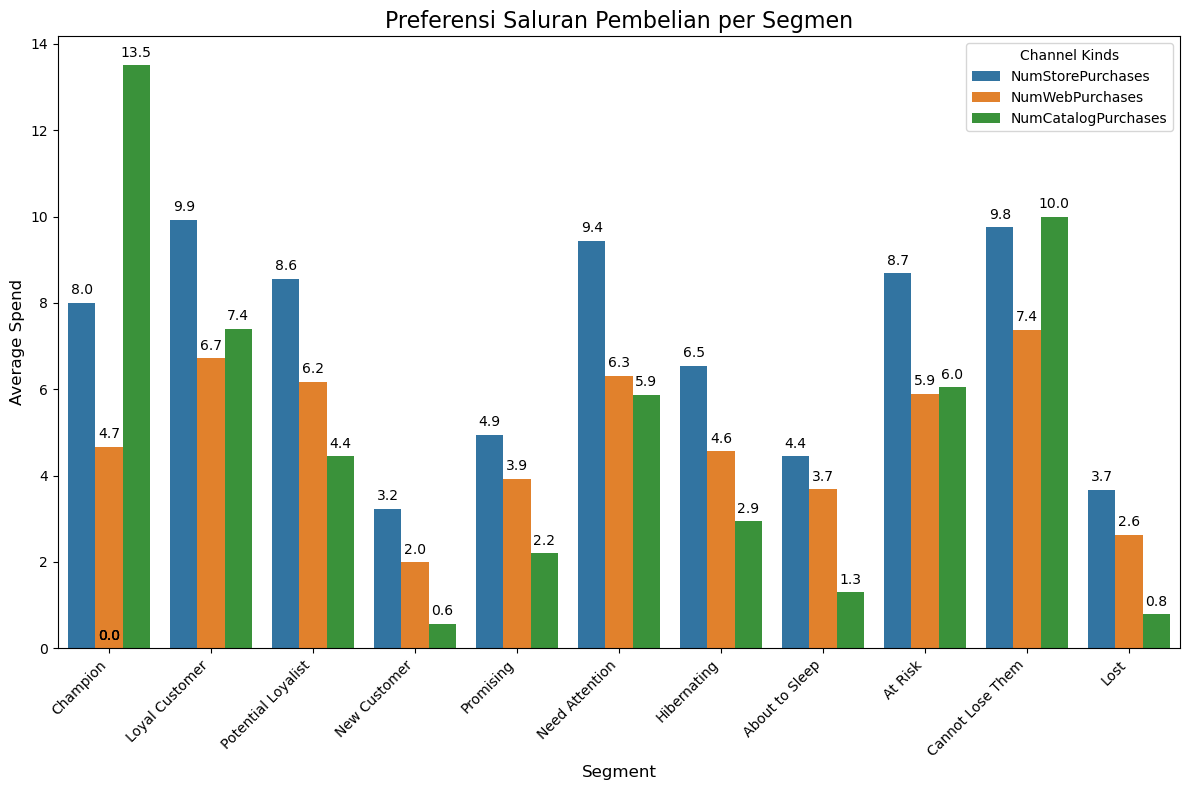

In [90]:
channel_cols = ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']
segment = ['Champion', 'Loyal Customer', 'Potential Loyalist', 'New Customer', 
        'Promising', 'Need Attention', 'Hibernating', 'About to Sleep', 'At Risk',
        'Cannot Lose Them', 'Hibernating', 'Lost']


channel_preferences = df_rfm.groupby('Segment')[channel_cols].mean().reset_index()
df_melted = pd.melt(channel_preferences, id_vars='Segment', value_vars=channel_cols, 
                var_name='Channel Kinds', value_name='Average Spend')

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Segment', y='Average Spend', hue='Channel Kinds', data=df_melted, order=segment)
plt.title('Preferensi Saluran Pembelian per Segmen', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Average Spend', fontsize=12)

plt.xticks(rotation=45, ha="right")
plt.legend(title='Channel Kinds', loc='upper right')
plt.tight_layout()

# Menambahkan anotasi pada setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()


> Insight: 
Preferensi saluran favorit:
* Store > Catalog > Web: Loyal, At Risk
* Store > Web > Catalog: Potential Loyalist, New Customer, Promising, Need Attention, Hibernating, About to Sleep, Lost
* Catalog > Store > Web: Champion, Cannot Lose Them

> Rekomendasi : Lakukan promosi eksklusif (voucher, pengantaran gratis) pada setiap saluran, terutama saluran yang cenderung rendah seperti Catalog.

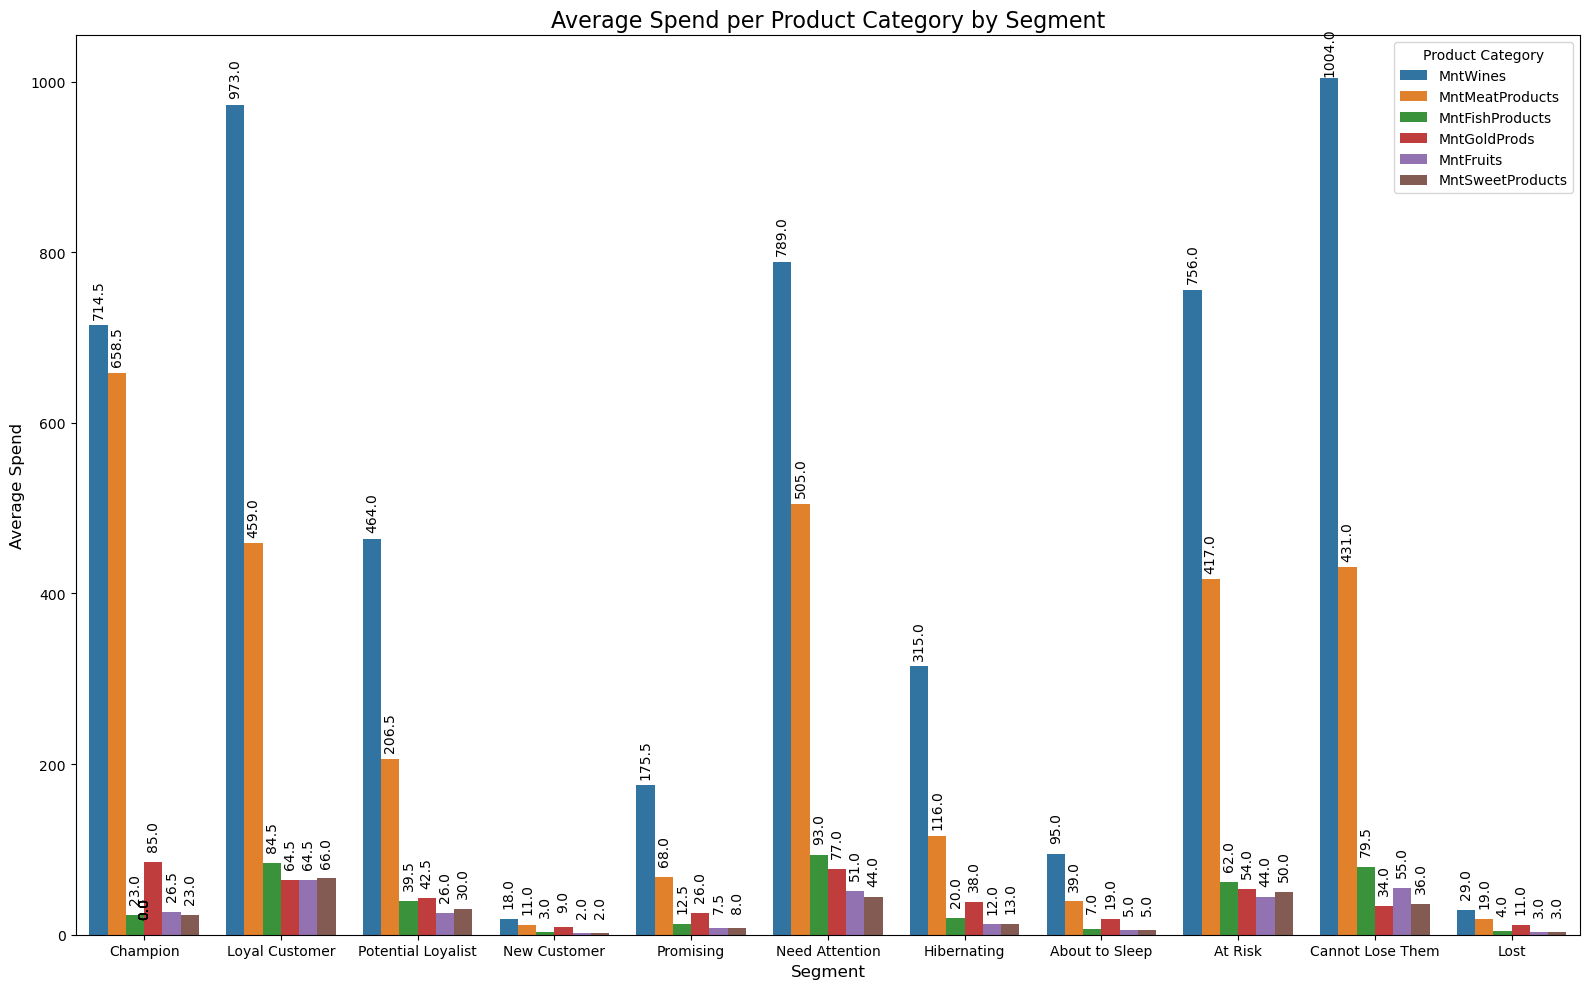

In [91]:
product_cols = ['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntFruits', 'MntSweetProducts']
segment = ['Champion', 'Loyal Customer', 'Potential Loyalist', 'New Customer', 
        'Promising', 'Need Attention', 'Hibernating', 'About to Sleep', 'At Risk',
        'Cannot Lose Them', 'Hibernating', 'Lost']

# Menghitung median pengeluaran per segmen dan produk
product_preferences = df_rfm.groupby('Segment')[product_cols].median().reset_index()

df_melted = pd.melt(product_preferences, id_vars='Segment', value_vars=product_cols, 
                var_name='Product Category', value_name='Average Spend')

# Plotting
plt.figure(figsize=(16, 10))
ax = sns.barplot(x='Segment', y='Average Spend', hue='Product Category', data=df_melted, order=segment)
plt.title('Average Spend per Product Category by Segment', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Average Spend', fontsize=12)

# plt.xticks(rotation=45, ha="right")
plt.legend(title='Product Category', loc='upper right')
plt.tight_layout()

# Menambahkan anotasi pada setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 19), 
                textcoords = 'offset points',
                rotation=90)

plt.show()

> Insight:
* Secara umum, setiap segmen menunjukkan pola yang konsisten di mana kategori produk yang paling diminati adalah MntWines, diikuti oleh MntMeatProducts, sementara kategori produk lainnya seperti MntFruits dan MntSweetProducts cenderung memiliki pengeluaran yang lebih rendah.
* Kategori Produk dengan Pengeluaran Tertinggi: Segmen Champion dan Loyal Customer memiliki pengeluaran tertinggi pada kategori MntWines, masing-masing mencapai 620 dan 554. Ini menunjukkan preferensi yang kuat terhadap produk wine dalam dua segmen yang paling loyal ini.
* Kategori Produk dengan Pengeluaran Terendah: Pengeluaran terendah terlihat pada kategori MntFruits dan MntSweetProducts di sebagian besar segmen, termasuk segmen Lost dan About to Sleep, dengan pengeluaran rata-rata mendekati 0. Hal ini menunjukkan bahwa produk buah dan permen kurang diminati atau dianggap kurang penting oleh pelanggan dalam segmen-segmen ini.

> Rekomendasi:
Lakukan bundle cross-selling antar produk paling diminati dengan produk yang kurang diminati.

## 5. Kesimpulan

Berdasarkan berbagai insight yang diperoleh dari analisis kampanye pemasaran dan pola perilaku pelanggan, dapat disimpulkan beberapa poin penting sebagai berikut:

1. Efektivitas Kampanye Pemasaran: 
    Belum ada kampanye yang cukup efektif. Rata-rata acceptance keenam kampanye hanya sekitar 7,4%. Dengan acceptance rate tertinggi di Kampanye 6 sebesar 15% dan terendah di Kampanye 2 sebesar 1,4%. 
2. Korelasi Antara Kampanye dan Pengeluaran Produk:
    Segmen "New Customer" memiliki jumlah pelanggan terbanyak (520), diikuti oleh segmen "Hibernating" (432), "Potential Loyalist" (322), "Lost" (245), "About to Sleep" (209), "At Risk" (177), "Promising" (154), "Need Attention" (99), "Loyal Customer" (42), "Cannot Lose Them" (8), dan "Champion" (6). Ini menunjukkan bahwa 50% pelanggan berada di segmen dengan nilai monetary yang rendah. Dan Top segmen (Champion dan Loyal Customer) justru berada di posisi terbawah.
3. Preferensi Pelanggan:
    * Variabel demografi pellanggan yang paling mempengaruhi segmen merupakan Income dan Dependents (Jumlah tanggungan).
    * Saluran favorit pelanggan di semua segmen adalah membeli di toko langsung.
    * Produk favorit pelanggan di semua segmen adalah Wine dan Meat.